# Explore here

# Pip & Requirements

In [1]:
pip install -r /workspaces/Linear-Regression/requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# **All Imports**

In [38]:
import timeit
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# **Initializations**

In [39]:
global_start_time = timeit.default_timer()

## **Step 1 Data collection**

In [40]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
total_data.to_csv("/workspaces/Linear-Regression/data/raw/rawdatafile.csv", index = False)
#poner gitgnore

## **Step 2: Exploration and data cleaning**

In [42]:
total_data.shape

(1338, 7)

In [43]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Missing data management

In [44]:
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

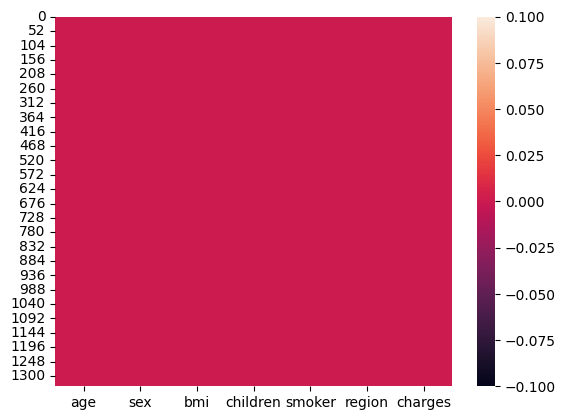

In [9]:
sns.heatmap(total_data.isnull(), annot = False)

### Duplicates Management

In [45]:
print(total_data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [46]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
duplicados = total_data[total_data.duplicated()]
print(duplicados)  #saber si hay duplicados, comprobar que ya no hay

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


### Factorize and Correlation

In [48]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]


C:\Users\penaf\AppData\Local\Temp\ipykernel_22728\1104917040.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = total_data.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

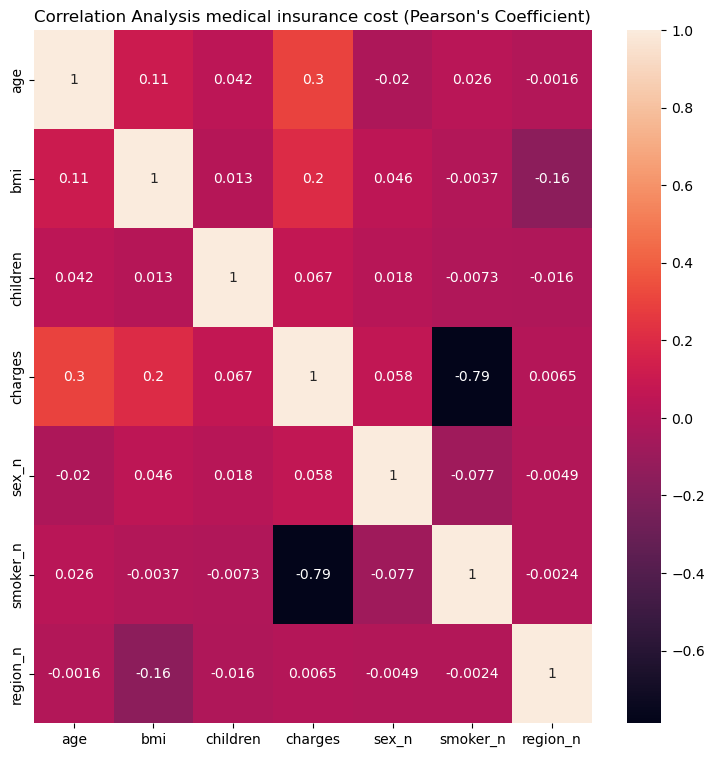

In [194]:
plt.figure(figsize=(9,9))
plt.title("Correlation Analysis medical insurance cost (Pearson's Coefficient)")
corr = total_data.corr()
sns.heatmap(corr, annot = True)
plt.show

Correlation relationships within the DataFrame:
   Variable Related Variable  Correlation
1       age          charges     0.298308
5   charges              age     0.298308
3       bmi          charges     0.198401
6   charges              bmi     0.198401
0       age              bmi     0.109344
2       bmi              age     0.109344
4       bmi         region_n    -0.157574
9  region_n              bmi    -0.157574
7   charges         smoker_n    -0.787234
8  smoker_n          charges    -0.787234


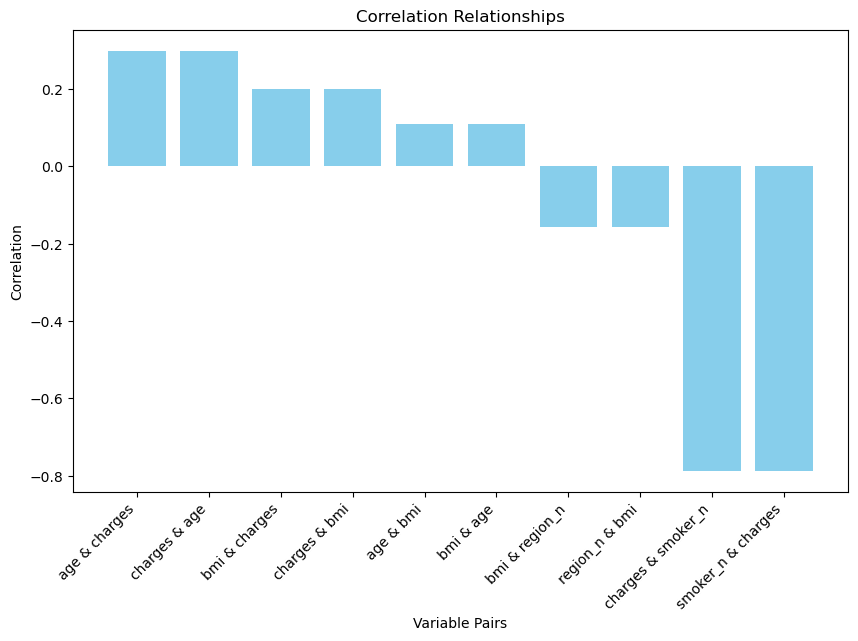

In [195]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Calcula la matriz de correlación
correlation_matrix = total_data.corr()

# Crea un DataFrame para almacenar las relaciones
relations_df = pd.DataFrame(columns=['Variable', 'Related Variable', 'Correlation'])

# Llena el DataFrame con las relaciones
for column in correlation_matrix.columns:
    related_columns = correlation_matrix.index[abs(correlation_matrix[column]) > 0.1].tolist()
    related_columns.remove(column)
    if related_columns:
        for related_column in related_columns:
            correlation_value = correlation_matrix.loc[related_column, column]
            relations_df = relations_df.append({'Variable': column, 'Related Variable': related_column, 'Correlation': correlation_value}, ignore_index=True)

# Ordena el DataFrame por magnitud de correlación
relations_df = relations_df.sort_values(by='Correlation', ascending=False)

# Imprime el DataFrame
print("Correlation relationships within the DataFrame:")
print(relations_df)

# Opcional: Gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.bar(relations_df['Variable'] + ' & ' + relations_df['Related Variable'], relations_df['Correlation'], color='skyblue')
plt.xlabel('Variable Pairs')
plt.ylabel('Correlation')
plt.title('Correlation Relationships')
plt.xticks(rotation=45, ha='right')
plt.show()


# Restaura la configuración original de advertencias después de ejecutar el código que genera los FutureWarnings (opcional)
warnings.filterwarnings("default", category=FutureWarning)

### Eliminate irrelevant information

In [49]:
#las variables que quieres eliminar no hay correlacion visible
total_data.drop(["sex", "children", 'sex_n'], axis=1, inplace=True)

In [50]:
print(total_data.columns)

Index(['age', 'bmi', 'smoker', 'region', 'charges', 'smoker_n', 'region_n'], dtype='object')


## **Step 3: Analysis of univariate variables**

### Analysis on categorical variables

In [116]:
categorical_columns = total_data.select_dtypes(include = ['O'])
categorical_columns.columns

Index(['smoker', 'region'], dtype='object')

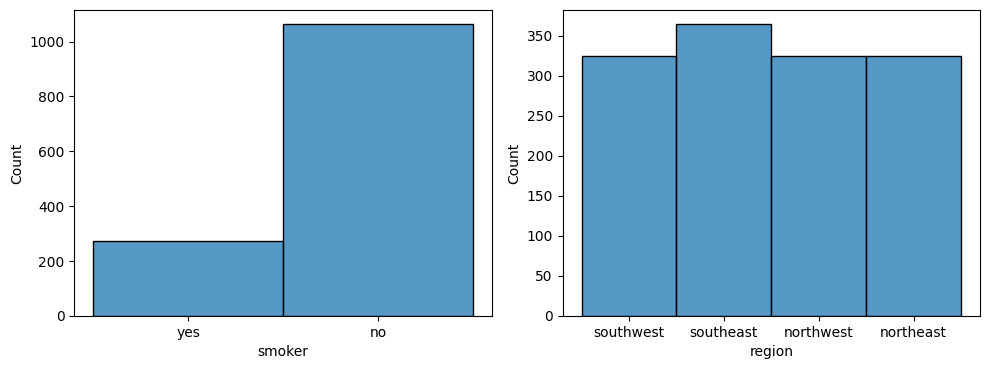

In [117]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

sns.histplot(ax=axes[0, 0], data=total_data, x='smoker')
sns.histplot(ax=axes[0, 1], data=total_data, x='region')

# Remove unnecessary subplots
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 1])

plt.tight_layout()

plt.show()

### Analysis on numeric variables

In [85]:
numerical_columns = total_data.select_dtypes(include = np.number)
numerical_columns.columns

Index(['age', 'bmi', 'charges', 'smoker_n'], dtype='object')

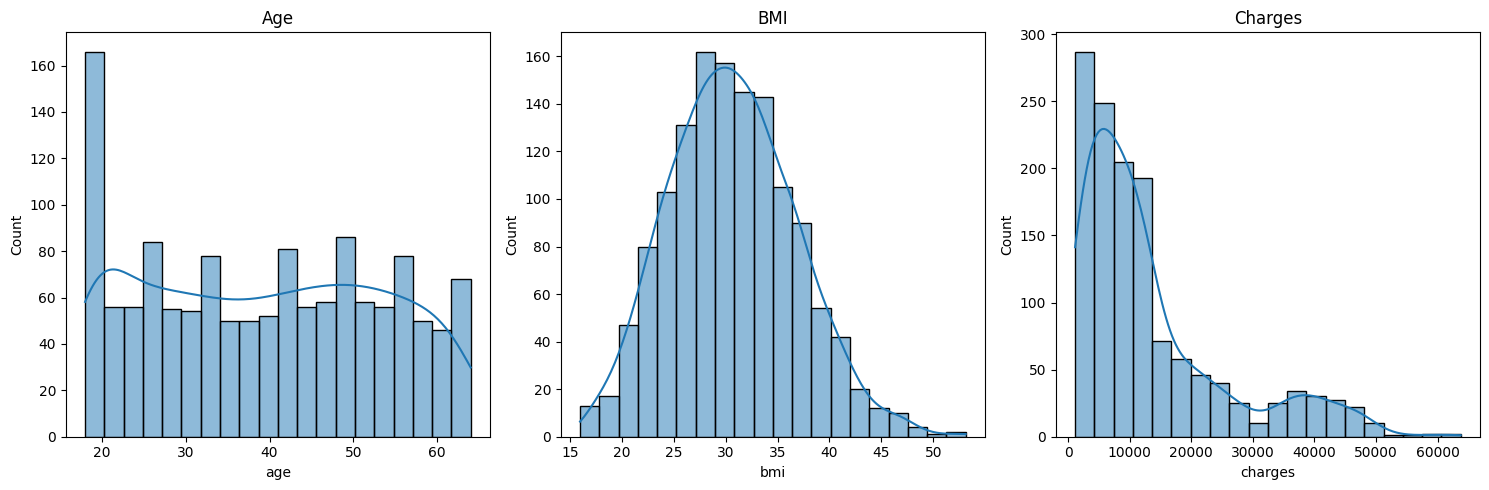

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(ax=axes[0], data=total_data, x='age', bins=20, kde=True)
axes[0].set_title('Age')

sns.histplot(ax=axes[1], data=total_data, x='bmi', bins=20, kde=True)
axes[1].set_title('BMI')

sns.histplot(ax=axes[2], data=total_data, x='charges', bins=20, kde=True)
axes[2].set_title('Charges')

# Adjust layout
plt.tight_layout()

plt.show()

## **Step 4: Analysis of multivariate variables**

### Numerical-numerical analysis

In [87]:
numerical_columns = total_data.select_dtypes(include = np.number)
numerical_columns.columns

Index(['age', 'bmi', 'charges', 'smoker_n'], dtype='object')

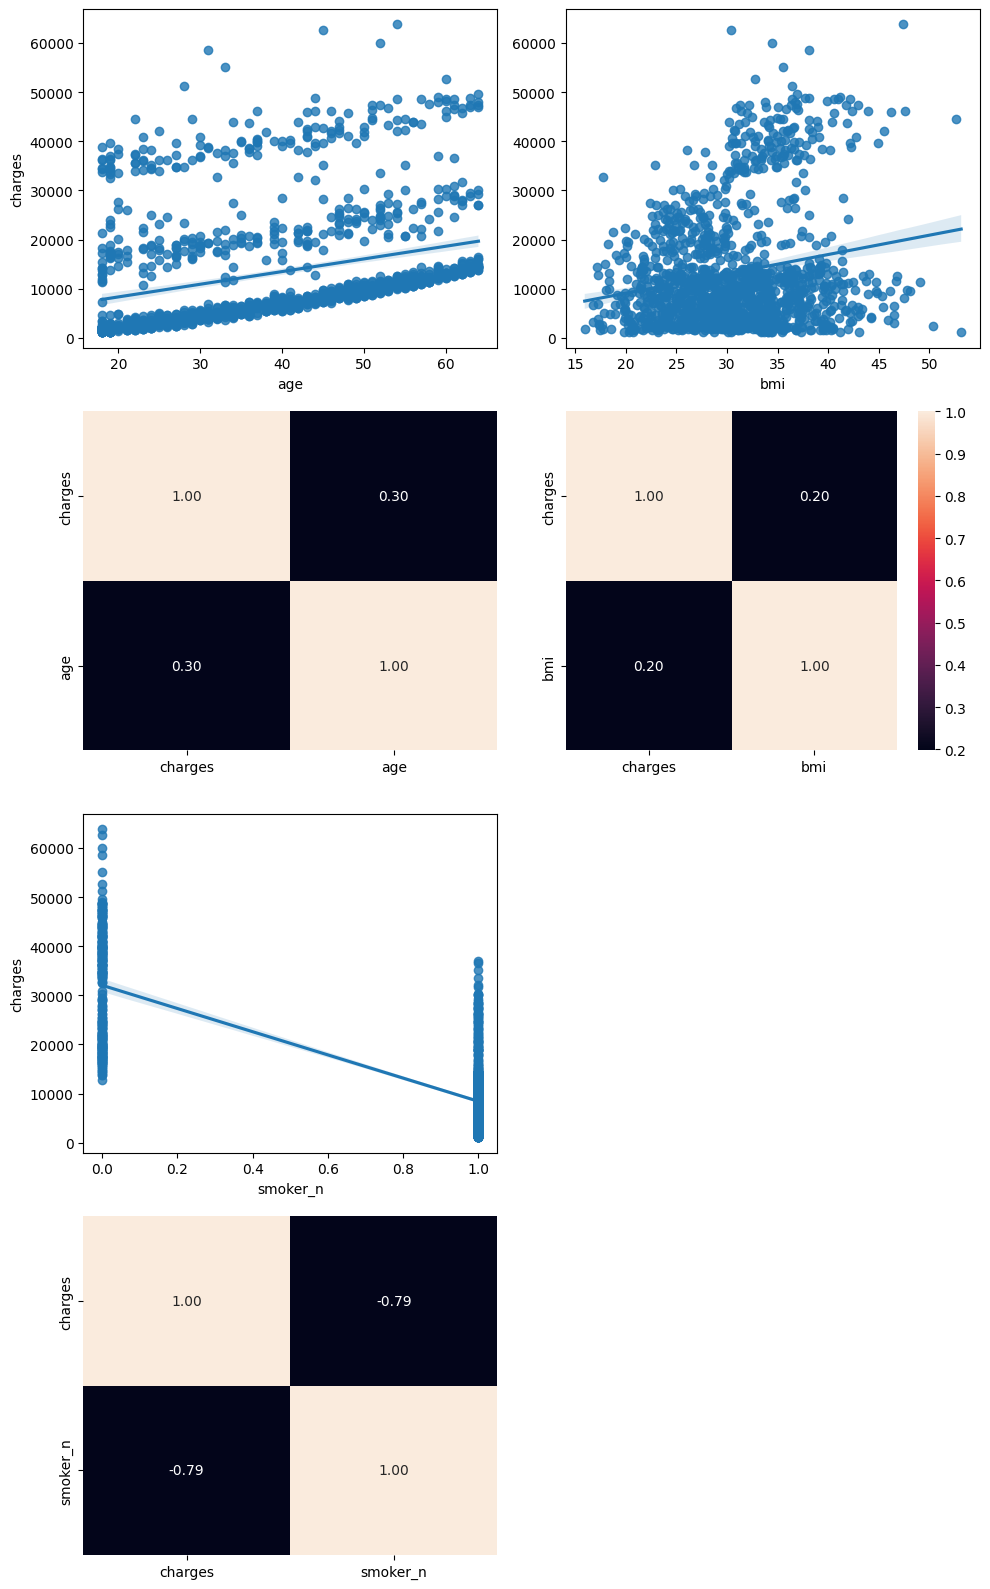

In [88]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize=(10, 16))

# Create Plates 
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="bmi", y="charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=total_data, x="smoker_n", y="charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

# Remove unnecessary subplots
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Analysing all the Data at Once

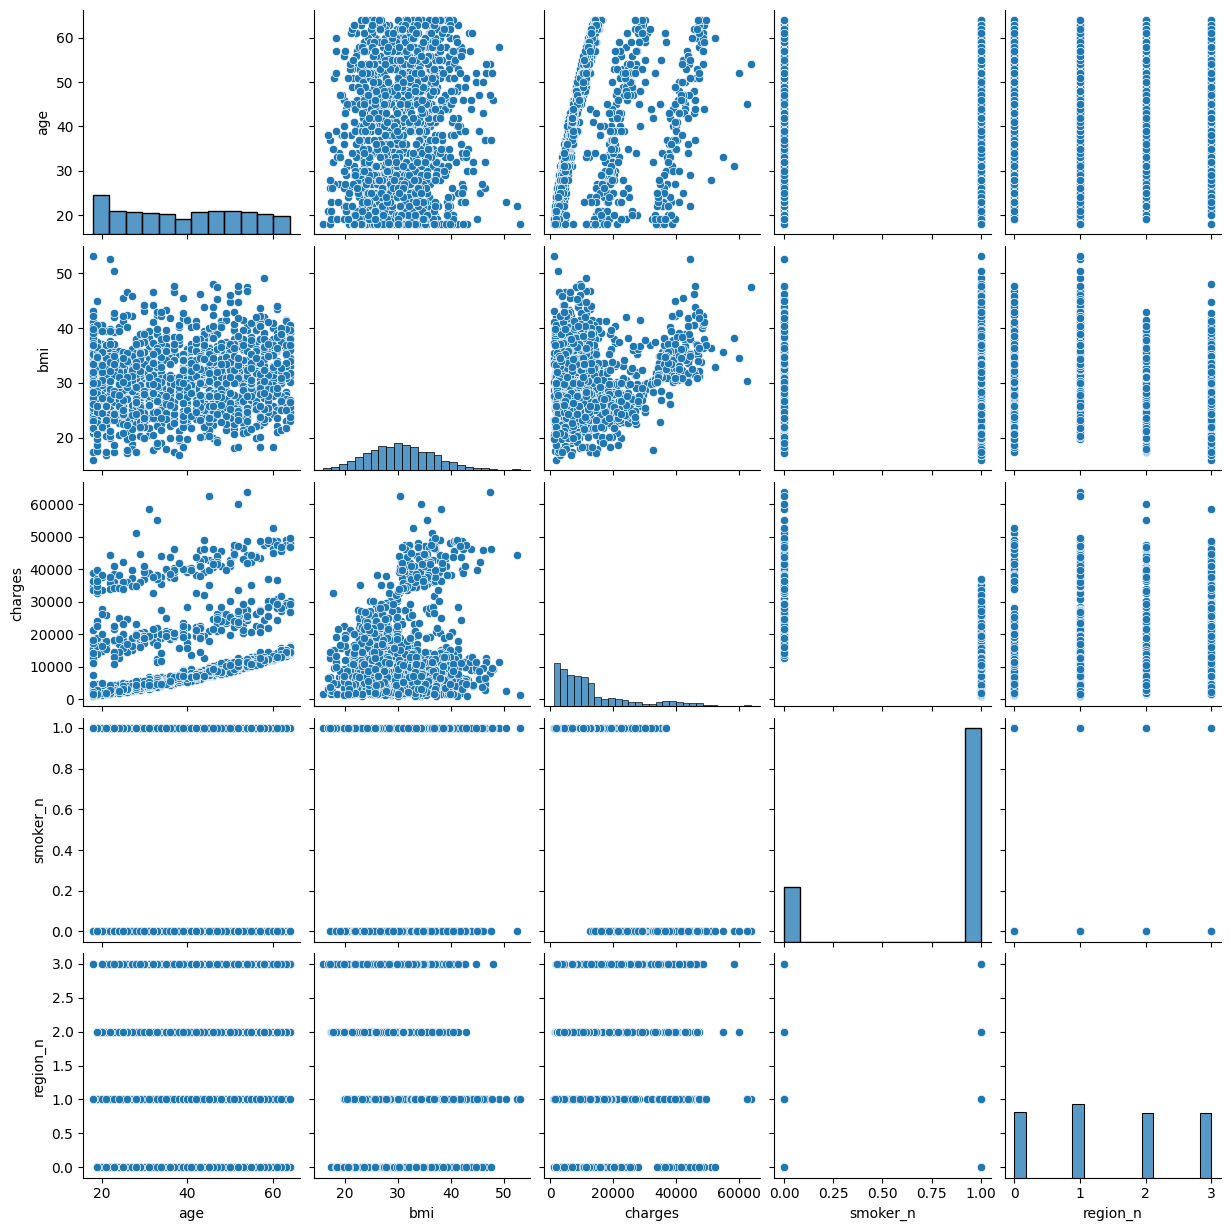

In [118]:
sns.pairplot(data = total_data)

## **Step 5: Feature engineering**

### Outlier analysis

In [51]:
total_data.describe()

,age,bmi,charges,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487,0.795064,1.483919
std,14.044333,6.100468,12110.359656,0.403806,1.105208
min,18.000000,15.960000,1121.873900,0.000000,0.000000
25%,27.000000,26.290000,4746.344000,1.000000,1.000000
50%,39.000000,30.400000,9386.161300,1.000000,1.000000
75%,51.000000,34.700000,16657.717450,1.000000,2.000000
max,64.000000,53.130000,63770.428010,1.000000,3.000000


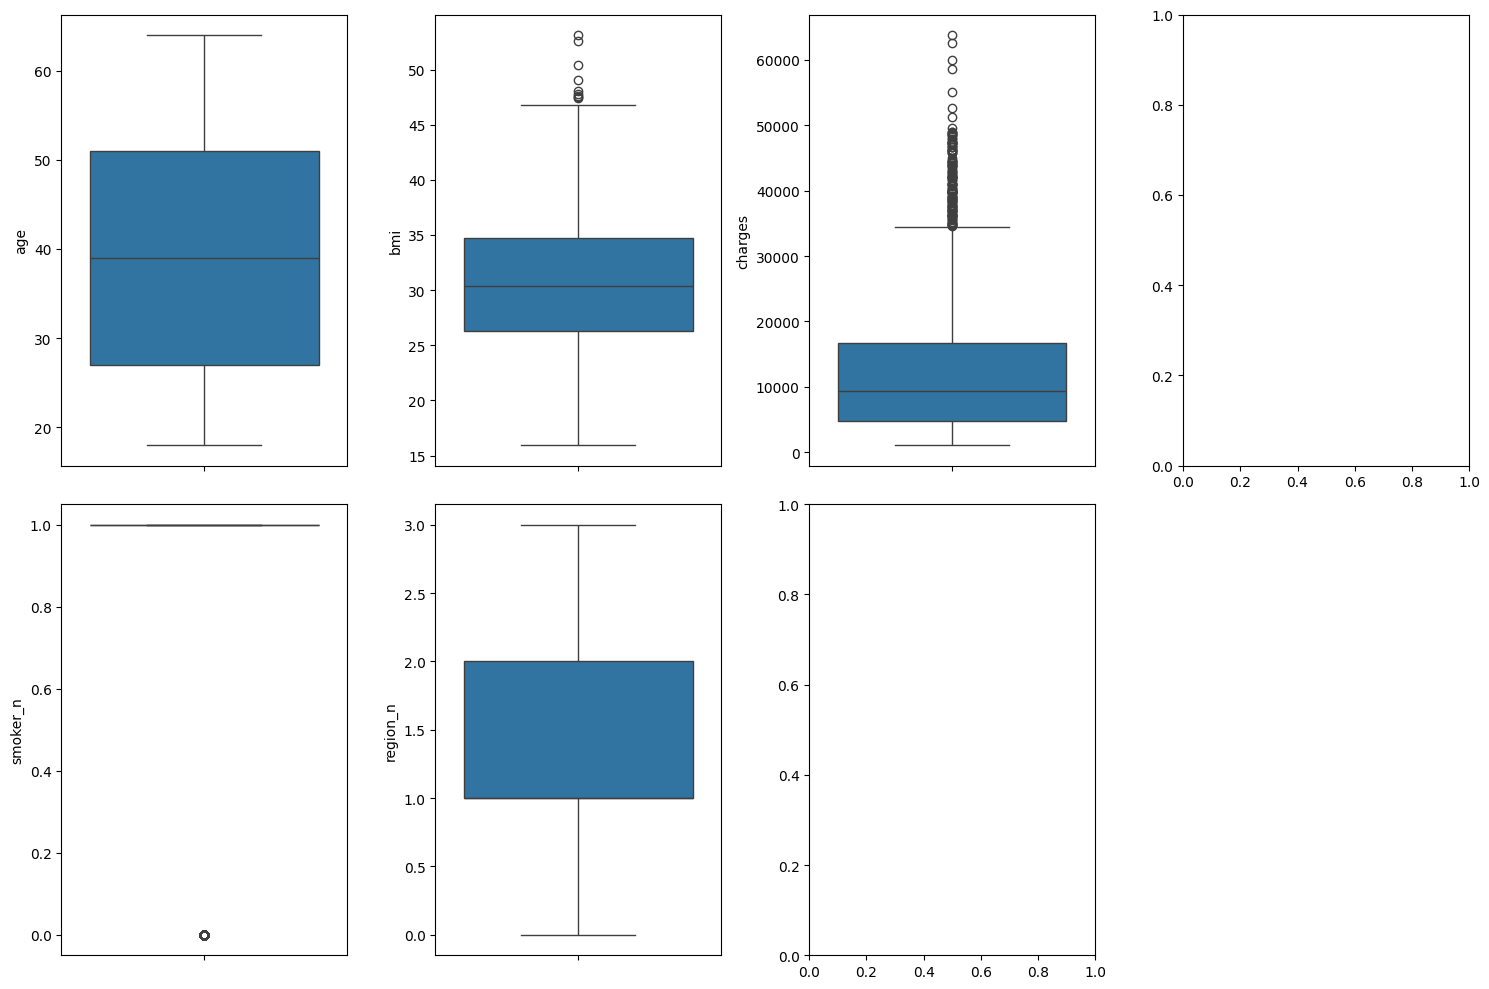

In [120]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=total_data, y="age")
sns.boxplot(ax=axes[0, 1], data=total_data, y="bmi")
sns.boxplot(ax=axes[0, 2], data=total_data, y="charges")
sns.boxplot(ax=axes[1, 0], data=total_data, y="smoker_n")
sns.boxplot(ax=axes[1, 1], data=total_data, y="region_n")


# Remove empty subplots
fig.delaxes(axes[1, 3])

plt.tight_layout()

plt.show()


### Outlier detection(bmi and charges)

In [19]:
# Stats for bmi
#bmi = total_data["bmi"].describe()
#bmi

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [20]:
# IQR for bmi
bmi_iqr = bmi["75%"] - bmi["25%"]
upper_limit_bmi = bmi["75%"] + 1.5 * bmi_iqr
lower_limit_bmi = bmi["25%"] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers in 'bmi' are {round(upper_limit_bmi, 2)} and {round(lower_limit_bmi, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")


The upper and lower limits for finding outliers in 'bmi' are 47.32 and 13.67, with an interquartile range of 8.41


In [21]:
# Clean the outliers
total_data = total_data[total_data["bmi"] < 45]


In [22]:
# Stats for charges
charges = total_data["charges"].describe()
charges

count     1317.000000
mean     13214.295287
std      11974.787971
min       1121.873900
25%       4746.344000
50%       9377.904700
75%      16657.717450
max      62592.873090
Name: charges, dtype: float64

In [23]:
# IQR for charges
charges_iqr = charges["75%"] - charges["25%"]
upper_limit_charges = charges["75%"] + 1.5 * charges_iqr
lower_limit_charges = charges["25%"] - 1.5 * charges_iqr

print(f"The upper and lower limits for finding outliers in 'bmi' are {round(upper_limit_charges, 2)} and {round(lower_limit_charges, 2)}, with an interquartile range of {round(charges_iqr, 2)}")


The upper and lower limits for finding outliers in 'bmi' are 34524.78 and -13120.72, with an interquartile range of 11911.37


In [24]:
# Clean the outliers

#total_data = total_data[total_data["charges"] <34500 ]
#not improves the model

 **Min-Max scaler**

In [52]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   bmi       1337 non-null   float64
 2   smoker    1337 non-null   object 
 3   region    1337 non-null   object 
 4   charges   1337 non-null   float64
 5   smoker_n  1337 non-null   int64  
 6   region_n  1337 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 73.2+ KB


In [53]:
num_variables = ["age", "bmi", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,age,bmi,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.000000,0.251611
1,0.000000,0.479150,1.0,0.333333,0.009636
2,0.217391,0.458434,1.0,0.333333,0.053115
3,0.326087,0.181464,1.0,0.666667,0.333010
4,0.304348,0.347592,1.0,0.666667,0.043816


## **Step 6: Feature selection**

In [54]:
X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,smoker_n,region_n
0,0.108696,0.230024,1.0,1.000000
1,0.065217,0.263250,1.0,1.000000
2,0.739130,0.580172,1.0,0.666667
3,0.978261,0.686306,1.0,0.333333
4,0.630435,0.286252,1.0,1.000000


Sanidad

In [55]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1337, 4)
Shape of y: (1337,)


In [56]:
X_test_sel.head()

,age,bmi,smoker_n,region_n
0,0.673913,0.176352,1.0,1.000000
1,0.239130,0.259349,1.0,0.000000
2,0.717391,0.549502,1.0,0.666667
3,0.282609,0.495830,0.0,0.666667
4,0.282609,0.603444,1.0,0.333333


In [57]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

#gitignore 

**Step 2: Linear Regression model**

In [58]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,smoker_n,region_n,charges
0,0.108696,0.230024,1.0,1.000000,0.020339
1,0.065217,0.263250,1.0,1.000000,0.034446
2,0.739130,0.580172,1.0,0.666667,0.516374
3,0.978261,0.686306,1.0,0.333333,0.196070
4,0.630435,0.286252,1.0,1.000000,0.137177


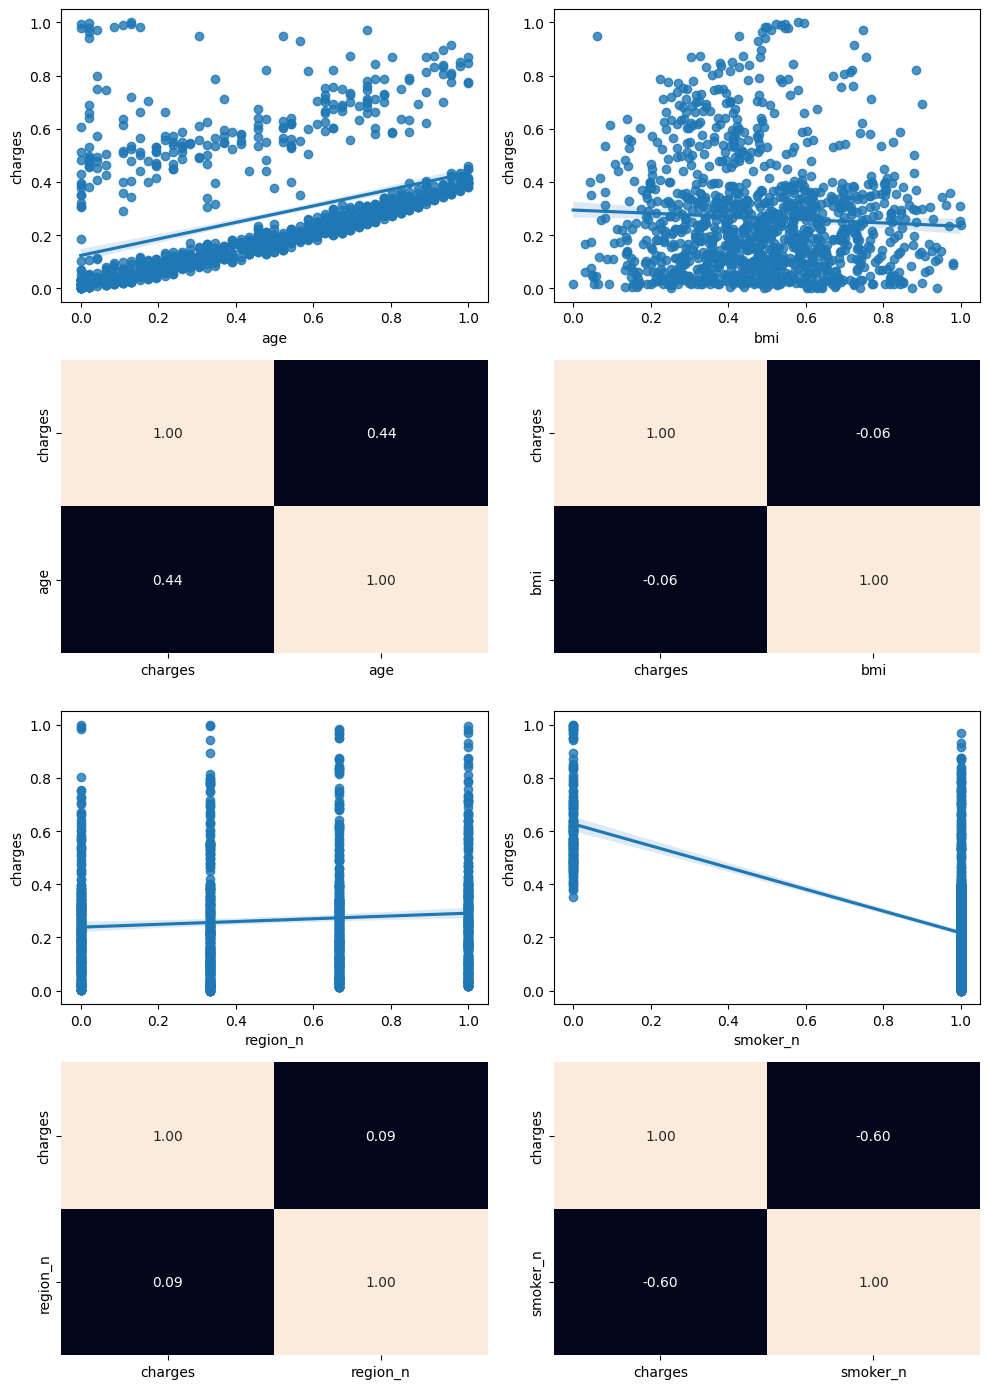

In [32]:
fig, axis = plt.subplots(4, 2, figsize=(10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data=total_data, x="age", y="charges", ax=axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(data=total_data, x="bmi", y="charges", ax=axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(data=total_data, x="region_n", y="charges", ax=axis[2, 0])
sns.heatmap(total_data[["charges", "region_n"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(data=total_data, x="smoker_n", y="charges", ax=axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

plt.tight_layout()
plt.show()


In [59]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3): {model.coef_}")

Intercepto (a): 0.3211235285997566
Coeficientes (b1, b2, b3): [ 0.1846869   0.18512846 -0.36829667  0.01181226]


In [62]:
y_pred = model.predict(X_test)
y_pred

array([ 0.12174978,  0.04500398,  0.19492298,  0.47298473,  0.12067299,
        0.18855886,  0.45615843,  0.01042469,  0.15515557,  0.14856749,
        0.15889421,  0.52228478,  0.47715183,  0.26512465,  0.14313828,
        0.12468273,  0.04572594,  0.49315625,  0.02349607,  0.06881395,
        0.04966336,  0.46529537,  0.2143085 ,  0.46689757,  0.48669247,
        0.06075348,  0.54299549,  0.57362381,  0.16291434,  0.18303036,
        0.09206502,  0.19038234, -0.0065786 ,  0.17491508,  0.62623802,
        0.17616556,  0.01979642,  0.02875343,  0.4901877 ,  0.1293977 ,
        0.09946097,  0.4536548 ,  0.52509583,  0.1785147 ,  0.09299235,
        0.04198517,  0.08576701,  0.12262957,  0.05053239,  0.12265989,
        0.08178282,  0.1819095 ,  0.47967838,  0.05130696,  0.14800011,
        0.13451659,  0.15580322,  0.02145398,  0.48385078,  0.12591115,
        0.20828199,  0.11591386,  0.17575328,  0.01526679,  0.23247667,
        0.14396054,  0.14997837,  0.48046701,  0.38361057,  0.24

### Compare model(before and after)

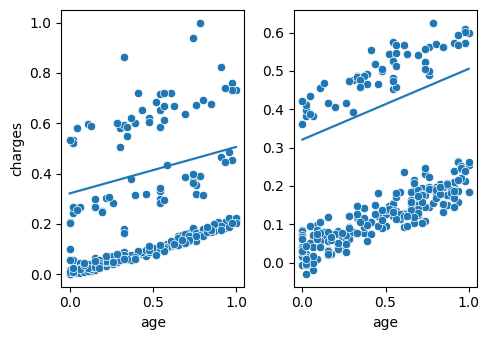

In [36]:
#Age

fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los plots
regression_equation = lambda x:  0.3211235285997566 + 0.1846869  * x

sns.scatterplot(ax = axis[0], data = test_data, x = "age", y = "charges")
sns.lineplot(ax = axis[0], x = test_data["age"], y = regression_equation(test_data["age"]))
sns.scatterplot(ax = axis[1], x = test_data["age"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["age"], y = regression_equation(test_data["age"])).set(ylabel = None)

plt.tight_layout()

plt.show()

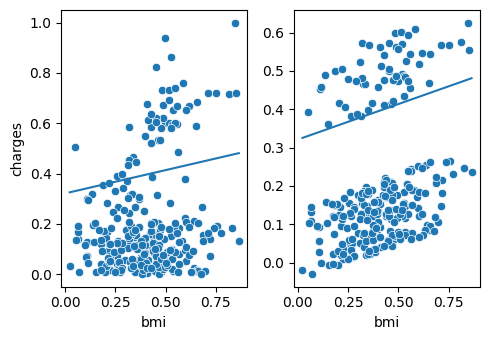

In [37]:
#bmi

fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los plots
regression_equation = lambda x:  0.3211235285997566 + 0.18512846  * x

sns.scatterplot(ax = axis[0], data = test_data, x = "bmi", y = "charges")
sns.lineplot(ax = axis[0], x = test_data["bmi"], y = regression_equation(test_data["bmi"]))
sns.scatterplot(ax = axis[1], x = test_data["bmi"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["bmi"], y = regression_equation(test_data["bmi"])).set(ylabel = None)

plt.tight_layout()

plt.show()

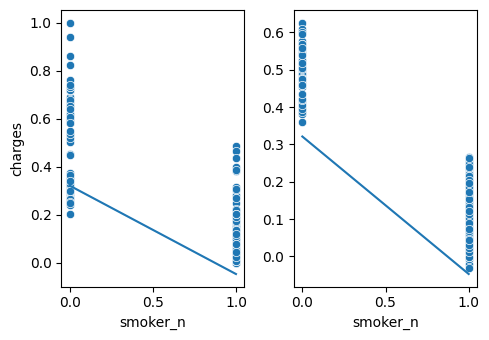

In [38]:
#Smoker_n

fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los plots
regression_equation = lambda x:  0.3211235285997566 + (-0.36829667)  * x

sns.scatterplot(ax = axis[0], data = test_data, x = "smoker_n", y = "charges")
sns.lineplot(ax = axis[0], x = test_data["smoker_n"], y = regression_equation(test_data["smoker_n"]))
sns.scatterplot(ax = axis[1], x = test_data["smoker_n"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["smoker_n"], y = regression_equation(test_data["smoker_n"])).set(ylabel = None)

plt.tight_layout()

plt.show()

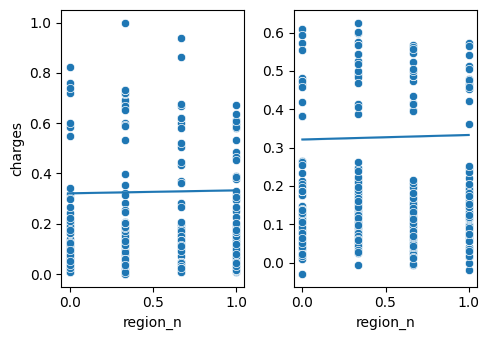

In [39]:
#Region_n

fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los plots
regression_equation = lambda x:  0.3211235285997566 + 0.01181226  * x

sns.scatterplot(ax = axis[0], data = test_data, x = "region_n", y = "charges")
sns.lineplot(ax = axis[0], x = test_data["region_n"], y = regression_equation(test_data["region_n"]))
sns.scatterplot(ax = axis[1], x = test_data["region_n"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["region_n"], y = regression_equation(test_data["region_n"])).set(ylabel = None)

plt.tight_layout()

plt.show()

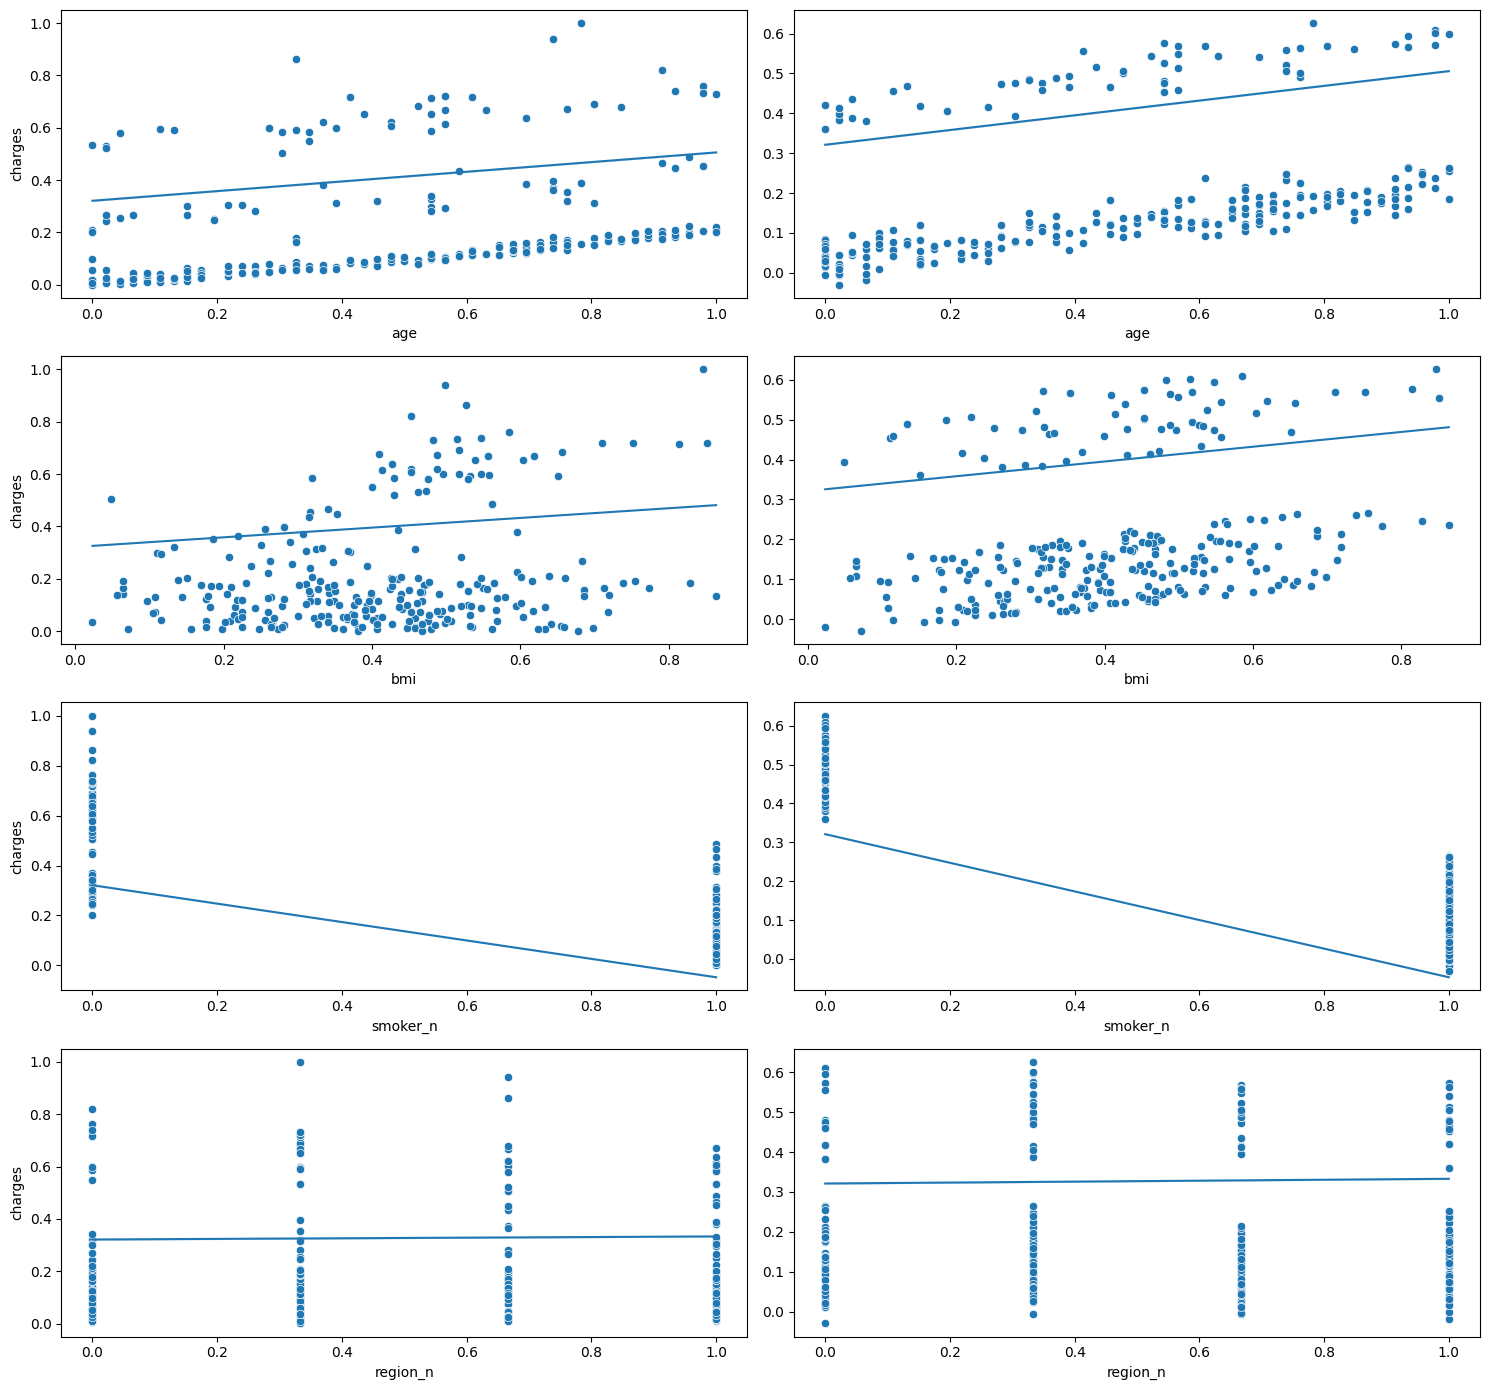

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(15, 14))
total_data = pd.concat([train_data, test_data])

# Age
regression_equation_age = lambda x: 0.3211235285997566 + 0.1846869 * x
sns.scatterplot(ax=axes[0, 0], data=test_data, x="age", y="charges")
sns.lineplot(ax=axes[0, 0], x=test_data["age"], y=regression_equation_age(test_data["age"]))
sns.scatterplot(ax=axes[0, 1], x=test_data["age"], y=y_pred)
sns.lineplot(ax=axes[0, 1], x=test_data["age"], y=regression_equation_age(test_data["age"])).set(ylabel=None)

# BMI
regression_equation_bmi = lambda x: 0.3211235285997566 + 0.18512846 * x
sns.scatterplot(ax=axes[1, 0], data=test_data, x="bmi", y="charges")
sns.lineplot(ax=axes[1, 0], x=test_data["bmi"], y=regression_equation_bmi(test_data["bmi"]))
sns.scatterplot(ax=axes[1, 1], x=test_data["bmi"], y=y_pred)
sns.lineplot(ax=axes[1, 1], x=test_data["bmi"], y=regression_equation_bmi(test_data["bmi"])).set(ylabel=None)

# Smoker_n
regression_equation_smoker = lambda x: 0.3211235285997566 + (-0.36829667) * x
sns.scatterplot(ax=axes[2, 0], data=test_data, x="smoker_n", y="charges")
sns.lineplot(ax=axes[2, 0], x=test_data["smoker_n"], y=regression_equation_smoker(test_data["smoker_n"]))
sns.scatterplot(ax=axes[2, 1], x=test_data["smoker_n"], y=y_pred)
sns.lineplot(ax=axes[2, 1], x=test_data["smoker_n"], y=regression_equation_smoker(test_data["smoker_n"])).set(ylabel=None)

# Region_n
regression_equation_region = lambda x: 0.3211235285997566 + 0.01181226 * x
sns.scatterplot(ax=axes[3, 0], data=test_data, x="region_n", y="charges")
sns.lineplot(ax=axes[3, 0], x=test_data["region_n"], y=regression_equation_region(test_data["region_n"]))
sns.scatterplot(ax=axes[3, 1], x=test_data["region_n"], y=y_pred)
sns.lineplot(ax=axes[3, 1], x=test_data["region_n"], y=regression_equation_region(test_data["region_n"])).set(ylabel=None)

plt.tight_layout()
plt.show()


In [63]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.009038035343724294
R2 Score: 0.806956821463823


In [64]:
print("Gloabl Elapsed Time ", timeit.default_timer() - global_start_time)

Gloabl Elapsed Time  125.32331621000003


In [ ]:
from pickle import dump

dump(model, open("../models/logistic_regression_MSE_R2_Score.sav", "wb"))